In [9]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [10]:
#Loading Data
pd.set_option("display.width", 3000)
pd.set_option('display.max_rows', 1000)
data = pd.read_csv("heart.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
5     57    1   0       140   192    0        1      148      0      0.4      1   0     1       1
6     56    0   1       140   294    0        0      153      0      1.3      1   0     2       1
7     44    1   1       120   263    0        1      173      0      0.0      2   0     3       1
8     52    1   2       172   199    1        1      162      0      0.5      2   0     3       1
9     57    1   2   

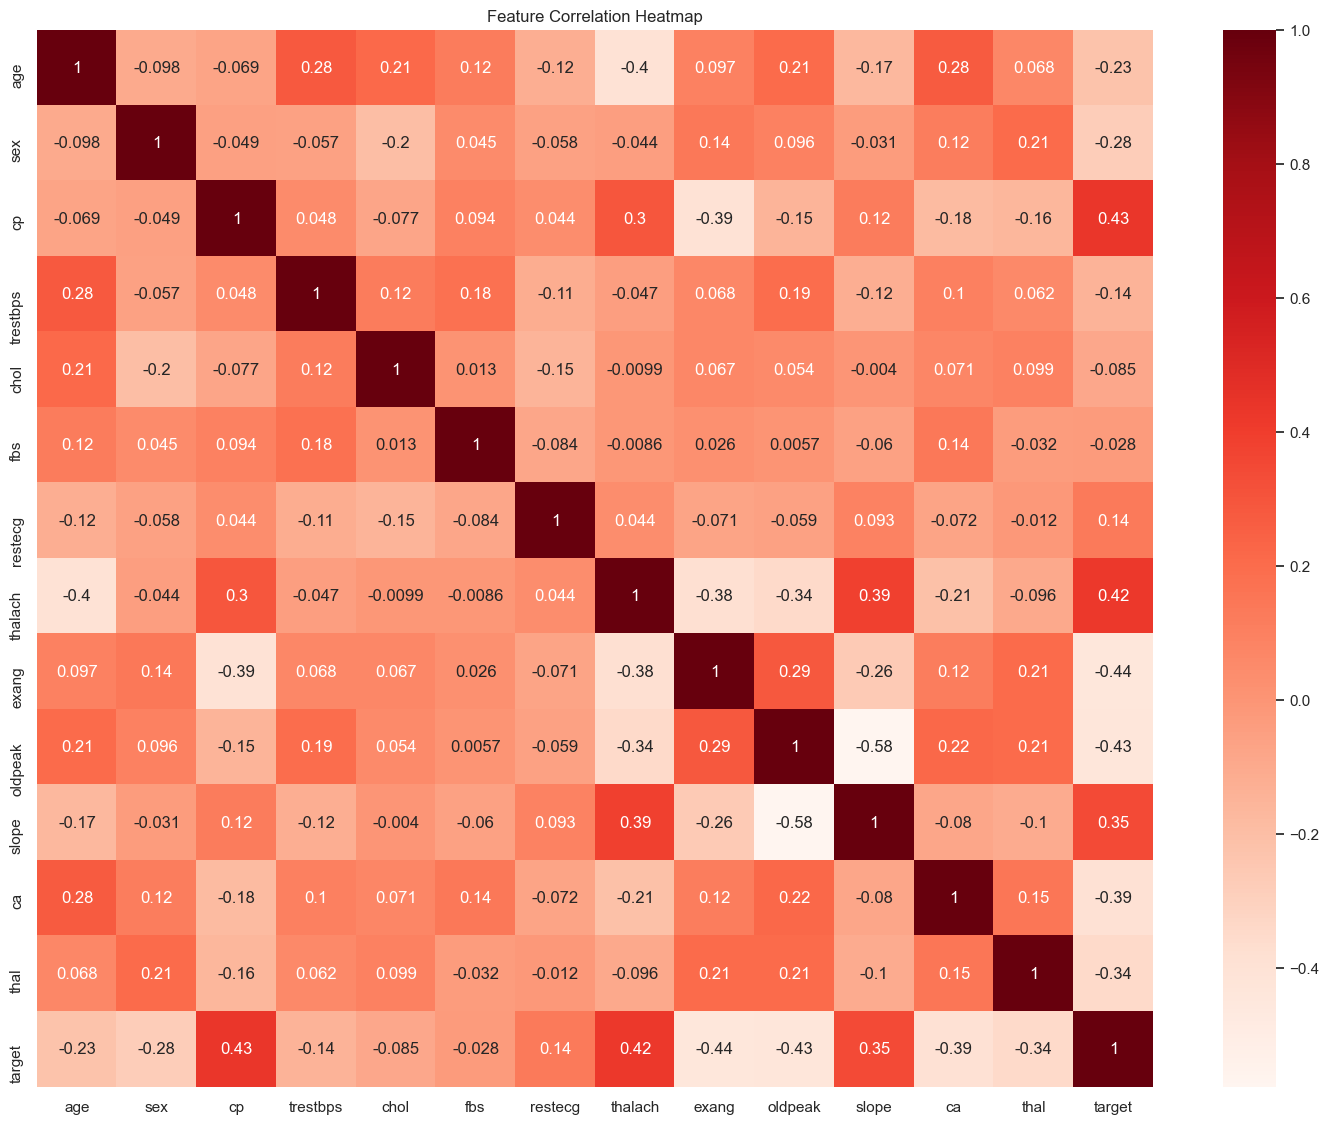

In [11]:
#Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr, annot=True, cmap='Reds')
b, t = plt.ylim()
plt.title("Feature Correlation Heatmap")
plt.show()


* Correlation between the response variable (target) seems to be highest with cp (Chest pain), thalach (Max Heart Rate Acheived), and slope (the peak excercise ST segment) with the values 0.43, 0.42, and 0.35 respectively. 
* The correlation between slope and thalach seems to be fairly high with a value of 0.39.
* The correlation between cp and thalach is also fairly high with a value of 0.3.
* The correlation between exang (Excercise-induced angina) and oldpeak (ST depression induced by excercise relative to resr) is yet another relatively high value at 0.29.

In [12]:
#Summary Statistics for Numerical Attributes:
for column in data.columns:
    if column != "sex" and column != "fbs" and column != "exang" and column != "target":
            print("")
            print(f"{column} Summary:")
            print(f"\tMinimum Value: {data[column].min()}")
            print(f"\tMaximum Value: {data[column].max()}")
            print(f"\tMedian: {data[column].median()}")
            print(f"\tMean: {data[column].mean()}")
            print(f"\tStandard Deviation: {data[column].std()}")


age Summary:
	Minimum Value: 29
	Maximum Value: 77
	Median: 55.0
	Mean: 54.366336633663366
	Standard Deviation: 9.082100989837857

cp Summary:
	Minimum Value: 0
	Maximum Value: 3
	Median: 1.0
	Mean: 0.966996699669967
	Standard Deviation: 1.0320524894832985

trestbps Summary:
	Minimum Value: 94
	Maximum Value: 200
	Median: 130.0
	Mean: 131.62376237623764
	Standard Deviation: 17.5381428135171

chol Summary:
	Minimum Value: 126
	Maximum Value: 564
	Median: 240.0
	Mean: 246.26402640264027
	Standard Deviation: 51.83075098793003

restecg Summary:
	Minimum Value: 0
	Maximum Value: 2
	Median: 1.0
	Mean: 0.528052805280528
	Standard Deviation: 0.525859596359298

thalach Summary:
	Minimum Value: 71
	Maximum Value: 202
	Median: 153.0
	Mean: 149.64686468646866
	Standard Deviation: 22.905161114914094

oldpeak Summary:
	Minimum Value: 0.0
	Maximum Value: 6.2
	Median: 0.8
	Mean: 1.0396039603960396
	Standard Deviation: 1.1610750220686348

slope Summary:
	Minimum Value: 0
	Maximum Value: 2
	Median: 1.0

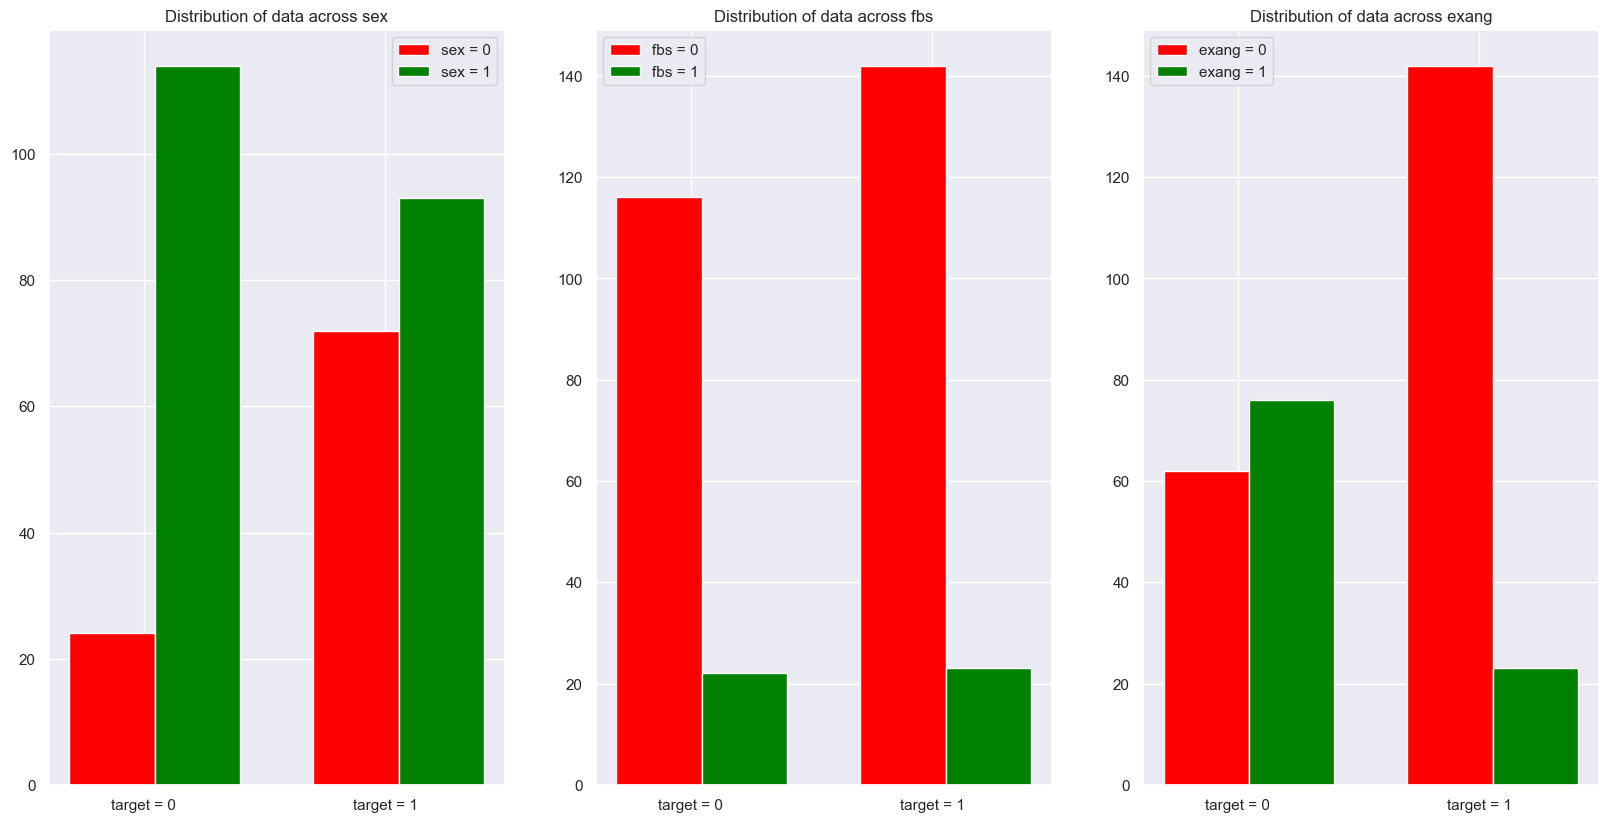

In [13]:
#Grouped Bar Graphs for Categorical Attributes 
#Setting up graphs
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100


fig, ax = plt.subplots(1, 3)


#List of categorical attributes 
categories = ["sex", "fbs", "exang"]

#Variable that keeps track of which graph is being made.
graphNum = 0


#For-loop. Creates grouped bar graphs of categorical attributes. 
for category in categories:
    data_group = data.groupby(category) #Seperates data by current attribute.
    
    
    
    
    #row = int(graphNum / 2) #The row of the current graph.
    #col = graphNum % 2 #The column of the current graph.
    
    #Since all categorical attributes are binary values represented by 0s and 1s, they can all be graphed as followed:
    ax[graphNum].bar([-0.5, 0.5], [len(data_group.get_group(0).groupby("target").get_group(0)), len(data_group.get_group(0).groupby("target").get_group(1))], 0.35, color="red", label=f"{category} = 0")
    ax[graphNum].bar([-0.15, 0.85], [len(data_group.get_group(1).groupby("target").get_group(0)), len(data_group.get_group(1).groupby("target").get_group(1))], 0.35, color="green", label=f"{category} = 1")
    
    #X-labels.
    ax[graphNum].set_xticks([-0.37, 0.62]) 
    ax[graphNum].set_xticklabels(["target = 0", "target = 1"])
    
    #Legend
    ax[graphNum].legend() #Legend.
    
    #Title
    ax[graphNum].set_title(f"Distribution of data across {category}")
    
    graphNum += 1 #Increment graphnum by 1.
    
plt.show()

* In total, there are 303 samples.
* For sex, 0 represents "female" while 1 represents "male."
* For fbs (fasting blood sugar), 0 represents values equal to or below 120 mg/dl while 1 represents values above 120 mg/dl.
* For exang (excercise induced angina), 0 represents "no" while 1 represents "yes." 

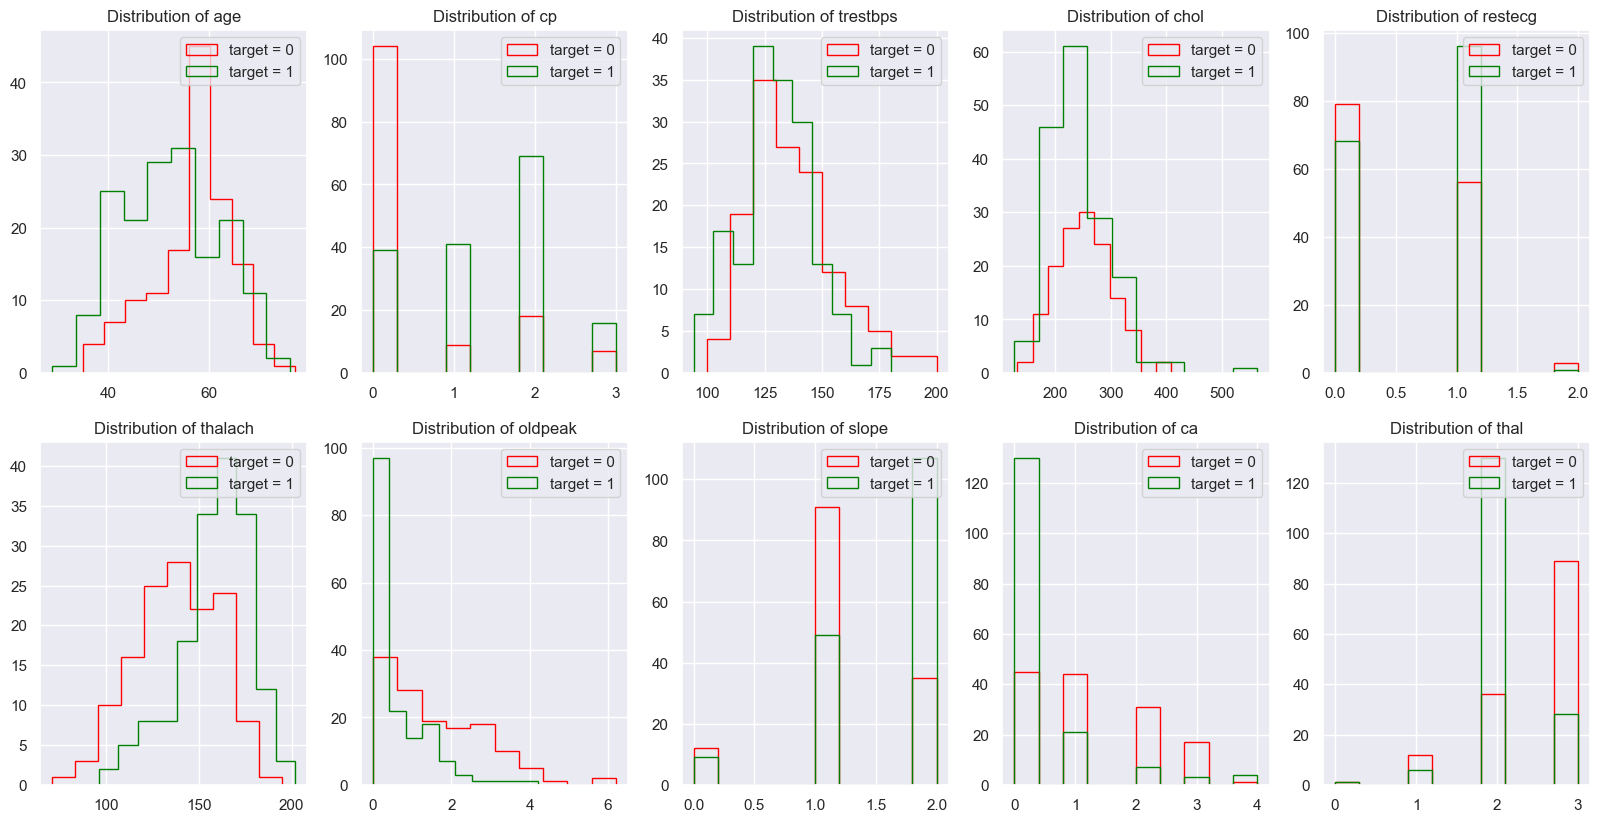

In [14]:
#Grouped Histograms for Numerical Attributes 

data_target = data.groupby("target") #Grouping data frame by target.

data_group_0 = data_target.get_group(0) #All the entries in which the response variable is 0.
data_group_1 = data_target.get_group(1) #All the entries in which the reponse variable is 1. 

fig_2, ax_2 = plt.subplots(2, 5) #There are 10 numerical attributes. 

histNum = 0 #Keeps track of which specific graph is being made. 

#for-loop to create Histograms. 
for column in data.columns:
    if column != "sex" and column != "fbs" and column != "exang" and column != "target":
        
        #Location of the current graph.
        row = int(histNum / 5) 
        col = histNum % 5
        
        #Making the graph.
        ax_2[row][col].hist(data_group_0[column], histtype="step", color="red", edgecolor="red", label="target = 0", fill=False)
        ax_2[row][col].hist(data_group_1[column], histtype="step", color="green", edgecolor="green", label="target = 1", fill=False)
        
        ax_2[row][col].set_title(f"Distribution of {column}")
        ax_2[row][col].legend()
        
        histNum += 1 #Increment histNum by 1. 

plt.show()

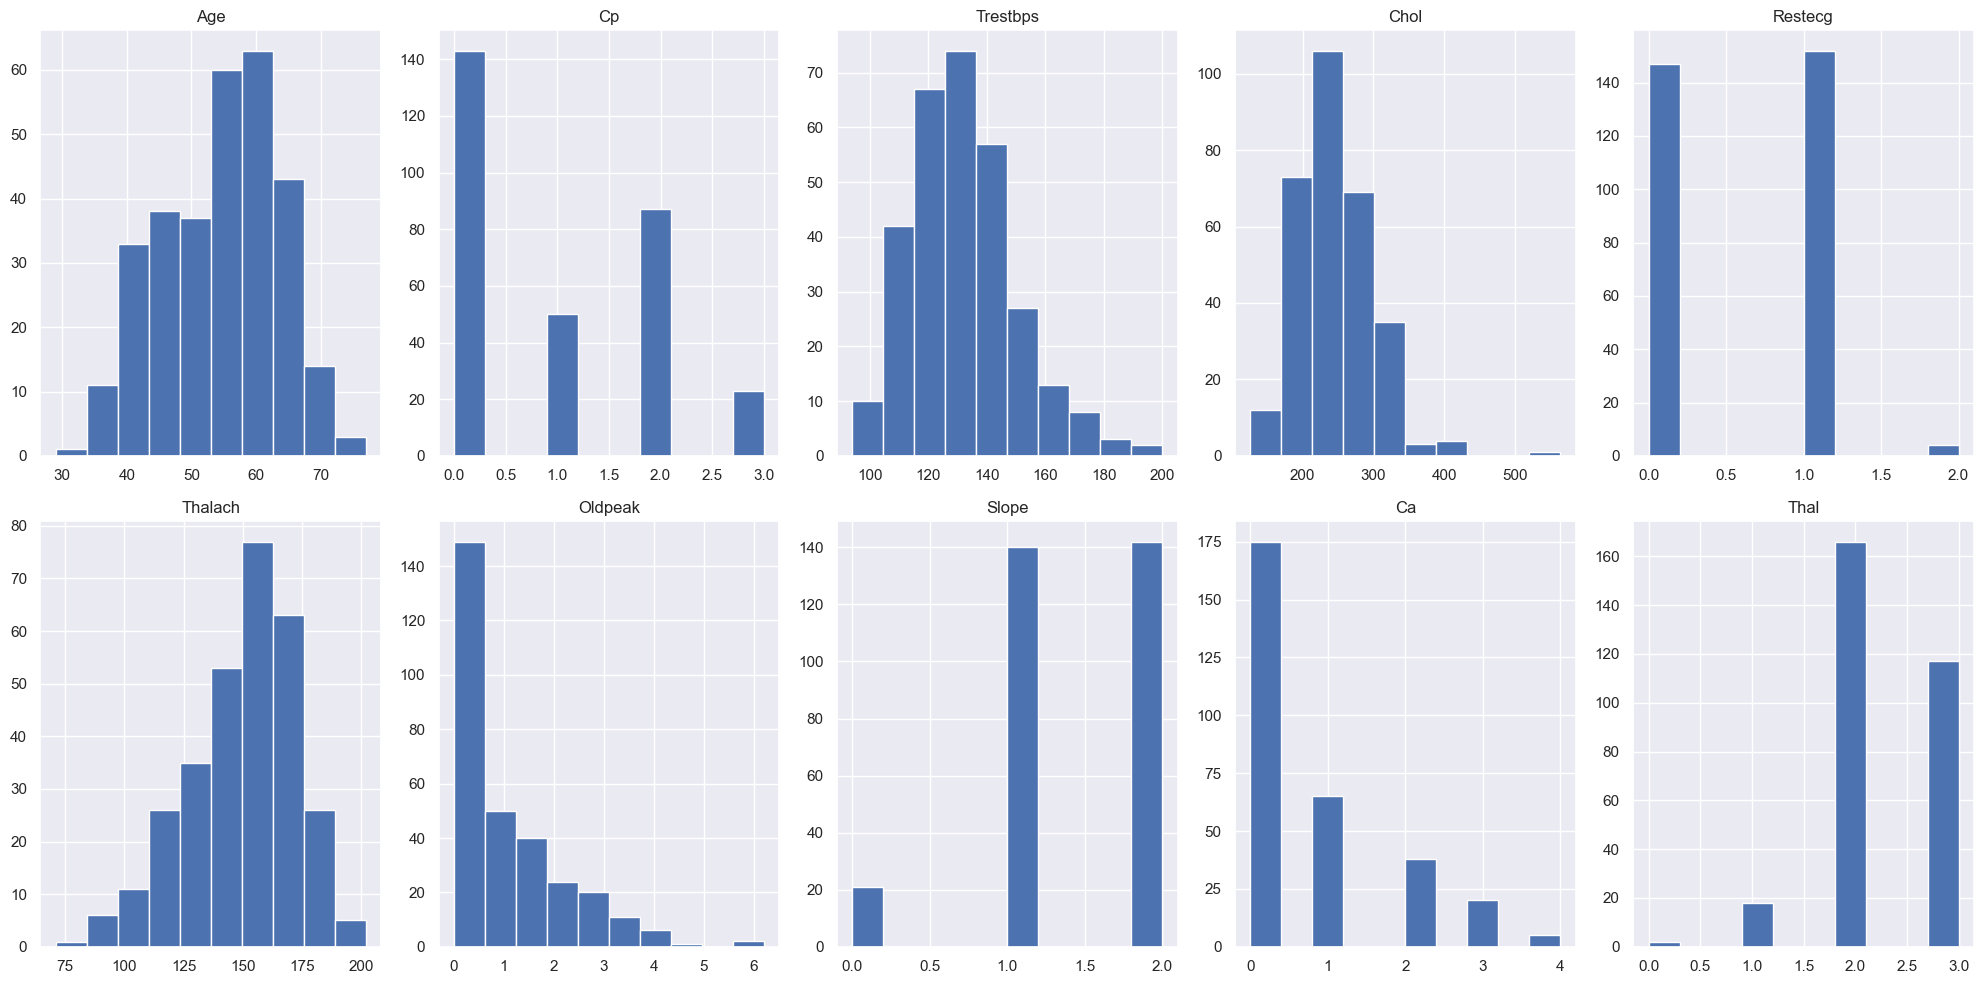

In [15]:
sns.set()

# https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html
fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2, 5)

ax0.hist(data["age"], histtype='bar')
ax0.set_title('Age')

ax1.hist(data["cp"], histtype='bar')
ax1.set_title('Cp')

ax2.hist(data["trestbps"], histtype='bar')
ax2.set_title('Trestbps')

ax3.hist(data["chol"], histtype='bar')
ax3.set_title('Chol')

ax4.hist(data["restecg"], histtype='bar')
ax4.set_title('Restecg')

ax5.hist(data["thalach"], histtype='bar')
ax5.set_title('Thalach')

ax6.hist(data["oldpeak"], histtype='bar')
ax6.set_title('Oldpeak')

ax7.hist(data["slope"], histtype='bar')
ax7.set_title('Slope')

ax8.hist(data["ca"], histtype='bar')
ax8.set_title('Ca')

ax9.hist(data["thal"], histtype='bar')
ax9.set_title('Thal')

fig.tight_layout()
plt.show()

* Although cp (Chest pain), restecg (Resting Electrocardiographic Results), and thal were originally collected as categorical attributes, they will be treated as numerical attributes for this anaylsis as the categories for each of these attrbutes are integer values in which higher values indicate a higher intensity. 

In [16]:
# Splitting Data

X_train, X_test, y_train, y_test =  train_test_split(data.iloc[:,:-1].values, data.iloc[:,13].values, test_size=0.25, random_state=0)

st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)    
X_test=st_x.transform(X_test)